In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import scipy as sp

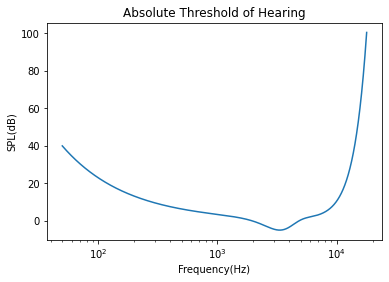

In [4]:
#absolute_threshold_of_hearing

fs=44100

f0 = np.linspace(10**1.7,10**4.25,1000000)
Tq_A=(3.64)*((f0/1000)**(-0.8))
Tq_B=(-6.5)*(np.exp((-0.6)*(((f0/1000)-(3.3))**2)))
Tq_C=((10**(-3)))*((f0/1000)**4)
Tq=Tq_A+Tq_B+Tq_C #eksiswsi 1

plt.semilogx(f0,Tq)
plt.ylabel("SPL(dB)")
plt.xlabel("Frequency(Hz)")
plt.title("Absolute Threshold of Hearing")
plt.show()

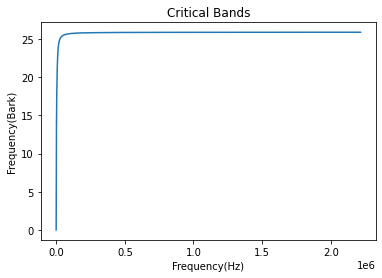

In [5]:
#Critical_Bands

f1=np.arange(0,16*np.pi*fs,1)
#print(f1)
bark=(13*np.arctan(0.00076*f1))+(3.5*np.arctan((f1/7500)**2)) #eksiswsi

plt.plot(f1,bark)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Frequency(Bark)")
plt.title("Critical Bands")
plt.show()

In [6]:
#windowing

N=512 #number of samples per hanning window

In [7]:
#part1.0

music=librosa.load('music.wav', sr=44100, mono=True)
music=music[0]
#sd.play(music,44100)
#print(len(music))

1178


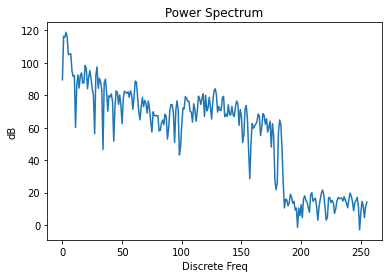

In [8]:
#part1.1

#compute power spectrum

P=[]
windows=int((len(music))/N)
print(windows)
for i in range(0,windows):
    result_fft=np.fft.fft(np.hanning(N)*music[i*N:(i+1)*N],int(N))
    temp=[]
    for k in range(int(0*len(result_fft)),int(len(result_fft)/2)): #kratame ton miso fft(logw summetrias
        temp.append(90.302+10*np.log10(np.power(abs(result_fft[k]),2)))
    P.append(temp)   



choice=0
k=np.arange(0,len(P[choice]),1) #plot the power spectrum for i-th frame
plt.plot(k,P[choice])
plt.xlabel("Discrete Freq")
plt.ylabel("dB")
plt.title("Power Spectrum")
plt.show()

256


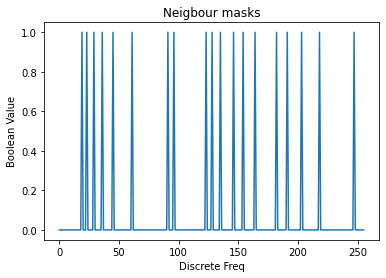

In [9]:
#part1.2

#first load all tables 
PNM=np.load('P_NM.npy')
PNMC=np.load('P_NMc.npy')
PTMC=np.load('P_TMc.npy')
PNM_T=np.transpose(PNM)
PNMC_T=np.transpose(PNMC)
PTMC_T=np.transpose(PTMC)

for win in range(0,windows):
    for j in range(0,256):
        if(j<3 or j>250):
            PNMC_T[win][j]=0
            PTMC_T[win][j]=0

#compute and plot ST for various windows

ST=[]

for i in range(0,windows): #note sto plithos twn parathrirwn exoume 1178 anti gia 1179 giati agnooume to teleutaio parathiro
    temp2=[]               #eixe pei pws mporoume na to kanoume kai etsi (enallaktika eipe ginetai kai padding me midenika)
    for k in range(0,256):
        if(k<3 or k>250): temp2.append(0)
        else:
            if(k>2 and k<63):
                if(  ( (P[i][k]>P[i][k+1]) and (P[i][k]>P[i][k-1]) ) and  ( (P[i][k]>P[i][k+2]+7) and (P[i][k]>P[i][k-2]+7) )  ):
                    temp2.append(1)
                else: 
                    temp2.append(0)
            if(k>62 and k<127):
                  if (  ( (P[i][k]>P[i][k+1]) and (P[i][k]>P[i][k-1]) ) and ( ( (P[i][k]>P[i][k+2]+7) and (P[i][k]>P[i][k-2]+7) ) or ( (P[i][k]>P[i][k+3]+7) and (P[i][k]>P[i][k-3]+7) )  )  ):
                        temp2.append(1)
                  else:
                        temp2.append(0)
            if(k>126 and k<250):
                if (  ( (P[i][k]>P[i][k+1]) and (P[i][k]>P[i][k-1]) ) and ( ( (P[i][k]>P[i][k+2]+7) and (P[i][k]>P[i][k-2]+7) ) or ( (P[i][k]>P[i][k+3]+7) and (P[i][k]>P[i][k-3]+7) ) or ( (P[i][k]>P[i][k+4]+7) and (P[i][k]>P[i][k-4]+7) )  or  ( (P[i][k]>P[i][k+5]+7) and (P[i][k]>P[i][k-5]+7) )   or  ( (P[i][k]>P[i][k+6]+7) and (P[i][k]>P[i][k-6]+7) )  )  ):
                    temp2.append(1)
                else:
                    temp2.append(0)
            if(k==250):
                if (  ( (P[i][k]>P[i][k+1]) and (P[i][k]>P[i][k-1]) ) and ( ( (P[i][k]>P[i][k+2]+7) and (P[i][k]>P[i][k-2]+7) ) or ( (P[i][k]>P[i][k+3]+7) and (P[i][k]>P[i][k-3]+7) ) or ( (P[i][k]>P[i][k+4]+7) and (P[i][k]>P[i][k-4]+7) )  or  ( (P[i][k]>P[i][k+5]+7) and (P[i][k]>P[i][k-5]+7) )   )  ):
                     temp2.append(1)
                else:
                    temp2.append(0)
    ST.append(temp2)

  
        
print(len(PTMC))

choice=0
k=np.arange(0,len(ST[choice]),1) #plot the power spectrum for choosed frame between frame 0 and 1177
plt.plot(k,ST[choice])
plt.xlabel("Discrete Freq")
plt.ylabel("Boolean Value")
plt.title("Neigbour masks")
plt.show()

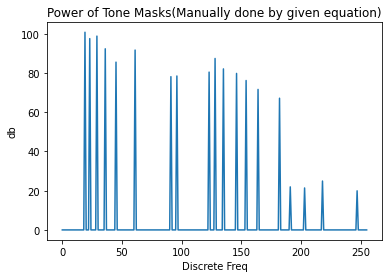

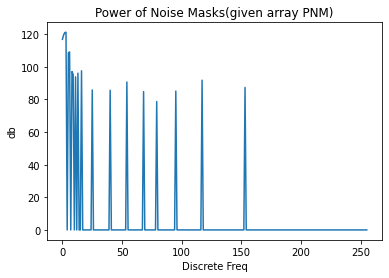

In [10]:
#compute and plot PNM

PTM_man=[] # to diko mas(manual) PNM
for i in range(0,windows):
    temp3=[]
    for k in range(0,256):
        if (ST[i][k]==0): temp3.append(0)
        else: 
             result=10*np.log10( np.power(10,(0.1*(P[i][k-1])))     +  np.power(10,(0.1*(P[i][k]))) + np.power(10,(0.1*(P[i][k+1]))) ) 
             temp3.append(result)
    PTM_man.append(temp3)
    
choice=0
k=np.arange(0,len(PTM_man[choice]),1) #plot the power spectrum for choised frame between frame 0 and 1177
plt.plot(k,PTM_man[choice])
plt.xlabel("Discrete Freq")
plt.ylabel("db")
plt.title("Power of Tone Masks(Manually done by given equation)")
plt.show()

k=np.arange(0,len(PNM_T[choice]),1) #plot the power spectrum for choised frame between frame 0 and 1177
plt.plot(k,PNM_T[choice])
plt.xlabel("Discrete Freq")
plt.ylabel("db")
plt.title("Power of Noise Masks(given array PNM)")
plt.show()     

In [11]:
#compute TTM

TTM=[] #pinakas sunolikos #efarmozoume typous tis 1.4
dictionary_win_j=[] #pinakas twn energwn j's se kathe window(me window gnwsto)
dictionary_overall=[] #pinakas twn i's pou epireazontai apo to j (me j,win gnwsta)
counter=0
for win in range(0,windows):
    temp00=[] #pinakas gia kathe window (256 pinakes me 256 stoixeia o kathenas)
    dictionary_j=[]
    dictionary_j_i=[]
    #print(win)
    for j in range(0,256):
            temp01=[] #pinakas gia kathe j (1 pinakas me 256 stoixeia)
            dictionary_i=[]
            if(PTMC_T[win][j]==0):
                for i in range(0,256):
                    temp01.append(0)
                    
            if(PTMC_T[win][j]!=0):
                dictionary_j.append(j)
                counter=0
                for i in range(0,256):
                    counter0=0
                    counter1=0
                    counter2=0
                    counter3=0
                    counter4=0
                    counter5=0
                    if( (bark[int((i)*fs*2*np.pi/N)]<bark[int((j)*fs*2*np.pi/N)]-3) or (bark[int((i)*fs*2*np.pi/N)]>bark[int((j)*fs*2*np.pi/N)]+8) ): 
                        temp01.append(0)
                        counter0+=1
                        counter+=1
                    if( (bark[int((i)*fs*2*np.pi/N)]>=bark[int((j)*fs*2*np.pi/N)]-3) and (bark[int((i)*fs*2*np.pi/N)]<=bark[int((j)*fs*2*np.pi/N)]+8) ):
                        dictionary_i.append(i)
                        DB=bark[int((i)*fs*2*np.pi/N)]-bark[int((j)*fs*2*np.pi/N)]
                        if(DB>=-4 and DB<-1):
                            SF=17*DB-0.4*PTMC_T[win][j]+11
                            temp01.append(PTMC_T[win][j]-0.275*bark[int((j)*fs*2*np.pi/N)]+SF-6.025)
                            counter1+=1
                            counter+=1
                        if(DB>=-1 and DB<0):
                            SF=(0.4*PTMC_T[win][j]+6)*DB
                            temp01.append(PTMC_T[win][j]-0.275*bark[int((j)*fs*2*np.pi/N)]+SF-6.025)
                            counter2+=1
                            counter+=1
                        if(DB>=0 and DB<1):
                            SF=-17*DB
                            temp01.append(PTMC_T[win][j]-0.275*bark[int((j)*fs*2*np.pi/N)]+SF-6.025)
                            counter3+=1
                            counter+=1
                        if(DB>=1 and DB<8):
                            SF=(0.15*PTMC_T[win][j]-17)*DB - 0.15*PTMC_T[win][j]
                            temp01.append(PTMC_T[win][j]-0.275*bark[int((j)*fs*2*np.pi/N)]+SF-6.025)
                            counter4+=1
                            counter+=1
                        if(DB>=8 or DB<-4):
                            SF=0
                            temp01.append(PTMC_T[win][j]-0.275*bark[int((j)*fs*2*np.pi/N)]+SF-6.025)
                            counter5+=1
                            counter+=1
                        #print(i,DB,counter0,counter1,counter2,counter3,counter4,counter5,(bark[int(i*fs*2/N)]<bark[int(j*fs*2/N)]-3) or (bark[int(i*fs*2/N)]>bark[int(j*fs*2/N)]+8))                
                #print(j,counter)
            temp00.append(temp01)
            dictionary_j_i.append(dictionary_i)
    dictionary_win_j.append(dictionary_j)
    dictionary_overall.append(dictionary_j_i)
    TTM.append(temp00)              

[19, 23, 29, 36, 45, 61]


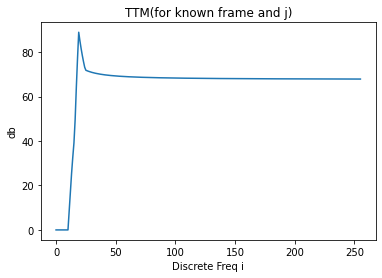

In [12]:
#plot TTM (for known j and window)

choose_frame=0


print(dictionary_win_j[choose_frame])
choose_j=19
#print(dictionary_overall[choose_frame][choose_j])



k=np.arange(0,len(TTM[choose_frame][choose_j]),1) #plot the power spectrum for choised frame between frame 0 and 1177
plt.plot(k,TTM[choose_frame][choose_j])
plt.xlabel("Discrete Freq i")
plt.ylabel("db")
plt.title("TTM(for known frame and j)")
plt.show()

In [13]:
#compute TNM (omoiws me TTM)

TNM=[] #pinakas sunolikos #efarmozoume typous tis 1.4
dictionary2_win_j=[] #pinakas twn energwn j's se kathe window(me window gnwsto)
dictionary2_overall=[] #pinakas twn i's pou epireazontai apo to j (me j,win gnwsta)
counter=0
for win in range(0,windows):
    temp00=[] #pinakas gia kathe window (256 pinakes me 256 stoixeia o kathenas)
    dictionary2_j=[]
    dictionary2_j_i=[]
    #print(win)
    for j in range(0,256):
            temp01=[] #pinakas gia kathe j (1 pinakas me 256 stoixeia)
            dictionary2_i=[]
            if(PNMC_T[win][j]==0):
                for i in range(0,256):
                    temp01.append(0)
                    
            if(PNMC_T[win][j]!=0):
                dictionary2_j.append(j)
                counter=0
                for i in range(0,256):
                    counter0=0
                    counter1=0
                    counter2=0
                    counter3=0
                    counter4=0
                    counter5=0
                    if( (bark[int((i)*fs*2*np.pi/N)]<bark[int((j)*fs*2*np.pi/N)]-3) or (bark[int((i)*fs*2*np.pi/N)]>bark[int((j)*fs*2*np.pi/N)]+8) ): 
                        temp01.append(0)
                        counter0+=1
                        counter+=1
                    if( (bark[int((i)*fs*2*np.pi/N)]>=bark[int((j)*fs*2*np.pi/N)]-3) and (bark[int((i)*fs*2*np.pi/N)]<=bark[int((j)*fs*2*np.pi/N)]+8) ):
                        dictionary2_i.append(i)
                        DB=bark[int((i)*fs*2*np.pi/N)]-bark[int((j)*fs*2*np.pi/N)]
                        if(DB>=-4 and DB<-1):
                            SF=17*DB-0.4*PNMC_T[win][j]+11
                            temp01.append(PNMC_T[win][j]-0.175*bark[int((j)*fs*2*np.pi/N)]+SF-2.025)
                            counter1+=1
                            counter+=1
                        if(DB>=-1 and DB<0):
                            SF=(0.4*PNMC_T[win][j]+6)*DB
                            temp01.append(PNMC_T[win][j]-0.175*bark[int((j)*fs*2*np.pi/N)]+SF-2.025)
                            counter2+=1
                            counter+=1
                        if(DB>=0 and DB<1):
                            SF=-17*DB
                            temp01.append(PNMC_T[win][j]-0.175*bark[int((j)*fs*2*np.pi/N)]+SF-2.025)
                            counter3+=1
                            counter+=1
                        if(DB>=1 and DB<8):
                            SF=(0.15*PNMC_T[win][j]-17)*DB - 0.15*PNMC_T[win][j]
                            temp01.append(PNMC_T[win][j]-0.175*bark[int((j)*fs*2*np.pi/N)]+SF-2.025)
                            counter4+=1
                            counter+=1
                        if(DB>=8 or DB<-4):
                            SF=0
                            temp01.append(PNMC_T[win][j]-0.175*bark[int((j)*fs*2*np.pi/N)]+SF-2.025)
                            counter5+=1
                            counter+=1
                        #print(i,DB,counter0,counter1,counter2,counter3,counter4,counter5,(bark[int(i*fs*2/N)]<bark[int(j*fs*2/N)]-3) or (bark[int(i*fs*2/N)]>bark[int(j*fs*2/N)]+8))                
                #print(j,counter)
            temp00.append(temp01)
            dictionary2_j_i.append(dictionary2_i)
    dictionary2_win_j.append(dictionary2_j)
    dictionary2_overall.append(dictionary2_j_i)
    TNM.append(temp00)

[3, 5, 6, 8, 9, 11, 13, 16, 25, 40, 54, 68, 79, 95, 117, 153]


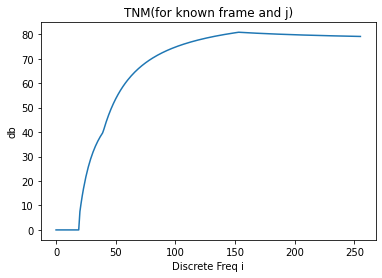

In [14]:
#plot TNM (for known j and window)

choose2_frame=0

print(dictionary2_win_j[choose2_frame])

choose2_j=153
#print((dictionary2_overall[choose2_frame][choose2_j]))



k=np.arange(0,len(TNM[choose2_frame][choose2_j]),1) #plot the power spectrum for choised frame between frame 0 and 1177
plt.plot(k,TNM[choose2_frame][choose2_j])
plt.xlabel("Discrete Freq i")
plt.ylabel("db")
plt.title("TNM(for known frame and j)")
plt.show()

In [15]:
#1.5

#compute Tg for each window
    

Tg=[]
for win in range (0,windows):
    #print(win)
    temp10=[]
    for i in range(0,256):
        res_ttm=0
        res_tnm=0
        res_tq=np.power(10,0.1*Tq[int(i*fs*2*np.pi/N)])
        for l in range(0,256):
            if(TTM[win][l][i]!=0):res_ttm+=np.power(10,0.1*TTM[win][l][i]) #agnooume midenikous orous
            if(TNM[win][l][i]!=0):res_tnm+=np.power(10,0.1*TNM[win][l][i])
        temp10.append(10*np.log(res_tnm+res_ttm+res_tq))
    Tg.append(temp10)
    
#print(len(PNMC_T[1]))


256


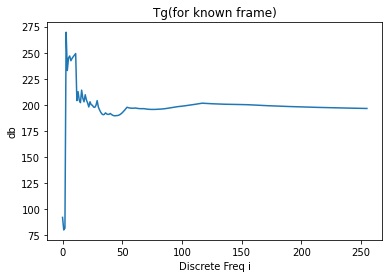

In [16]:
#plot Tg (for know frame)


choose_frame= 0
print(len(Tg[choose_frame]))
k=np.arange(0,len(Tg[choose_frame]),1)
plt.plot(k,Tg[choose_frame])
plt.xlabel("Discrete Freq i")
plt.ylabel("db")
plt.title("Tg(for known frame)")
plt.show()

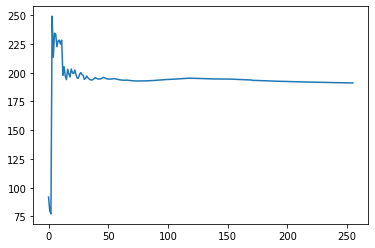

In [17]:
#plot mean Tg (ισως και αχρειαστο)

print()

Tg_mean=[]
for j in range(0,256):
        temp=0
        for win in range(0,windows):
            #print(Tg[win][j])
            temp+=Tg[win][j]
        Tg_mean.append(temp/windows)

k=np.arange(0,len(Tg_mean),1)
plt.plot(k,Tg_mean)
    

In [18]:
def checkMaskersPTM(PTM_array,Tq_array,b):
    
    streches=[]
    k=0

    Db_array=[]
    for i in range(0,256):
        Db_array.append(b[int(i*2*np.pi*fs/N)])

    
    
    
    while(k<256):
        if(k>254):
            streches[len(streches)-1].append(k)
            break
        strech_i=[]
        if(abs(Db_array[k+1]-Db_array[k])<0.5):
            difference=0.5-(Db_array[k+1]-Db_array[k])
            j=k+1
            strech_i.append(k)
            strech_i.append(j)
            while(difference>0 and j<255):
                difference=difference-(Db_array[j+1]-Db_array[j])
                strech_i.append(j+1)
                j+=1
            strech_i=strech_i[:len(strech_i)-1]
            k=j
        else: k=k+1
        if(len(strech_i)>=1):streches.append(strech_i)

    #print(streches)
    #print(Db_array[30],Db_array[38])

    parartima_b_PTM=[]
    for win in range(0,windows):
        PTM_mid=[]
        for k in range(0,256):
            if(PTM_array[win][k]>Tq_array[int(k*fs*2*np.pi/N)]):
                PTM_mid.append(PTM_array[win][k])
            else:PTM_mid.append(0)

        result_win=[]
    #if (win==111):print(PTM_mid)
    #if(win==111):print(PTMC_T[win])

        for i in range(0,len(streches)):
            temp_array_2=[]
            temp_array_1=[]
            for j in range(0,len(streches[i])):
                temp_array_1.append(int(streches[i][j]))
                temp_array_1.append(PTM_mid[int(streches[i][j])])
                temp_array_2.append(PTM_mid[int(streches[i][j])])
   
            if(i==0):
                for wmega in range(0,3):
                    result_win.append(0)
                for wmega in range(3,12):
                    #print("You got inside")
                    result_win.append(PTM_mid[wmega])
            find_max=np.where(temp_array_2 == np.amax(temp_array_2))
            max_index=(int(find_max[0][0]))
            for k in range(0,len(temp_array_2)):
                if(k==max_index):result_win.append(temp_array_2[int(max_index)])
                else:result_win.append(0)
         #if(win==111):print(result_win)
        parartima_b_PTM.append(result_win)
    return(parartima_b_PTM)


#run it
new_PTM=checkMaskersPTM(PTM_man,Tq,bark)
choose_frame=0
#print(new_PTM[choose_frame])
#print("")
#print(PTMC_T[choose_frame])

In [19]:
def checkMaskersPNM(PNM_array,Tq_array,b):
    
    streches=[]
    k=0

    Db_array=[]
    for i in range(0,256):
        Db_array.append(b[int(i*2*np.pi*fs/N)])

    
    
    
    while(k<256):
        if(k>254):
            streches[len(streches)-1].append(k)
            break
        strech_i=[]
        if(abs(Db_array[k+1]-Db_array[k])<0.5):
            difference=0.5-(Db_array[k+1]-Db_array[k])
            j=k+1
            strech_i.append(k)
            strech_i.append(j)
            while(difference>0 and j<255):
                difference=difference-(Db_array[j+1]-Db_array[j])
                strech_i.append(j+1)
                j+=1
            strech_i=strech_i[:len(strech_i)-1]
            k=j
        else: k=k+1
        if(len(strech_i)>=1):streches.append(strech_i)

    #print(streches)
    #print(Db_array[30],Db_array[38])

    parartima_b_PNM=[]
    for win in range(0,windows):
        PNM_mid=[]
        for k in range(0,256):
            if(PNM_array[win][k]>Tq_array[int(k*fs*2*np.pi/N)]):
                PNM_mid.append(PNM_array[win][k])
            else:PNM_mid.append(0)

        result_win=[]
    #if (win==111):print(PTM_mid)
    #if(win==111):print(PTMC_T[win])

        for i in range(0,len(streches)):
            temp_array_2=[]
            temp_array_1=[]
            for j in range(0,len(streches[i])):
                temp_array_1.append(int(streches[i][j]))
                temp_array_1.append(PNM_mid[int(streches[i][j])])
                temp_array_2.append(PNM_mid[int(streches[i][j])])
   
            if(i==0):
                for wmega in range(0,3):
                    #print("You got inside")
                    result_win.append(0)
                for wmega in range(3,12):
                    result_win.append(PNM_mid[wmega])
            find_max=np.where(temp_array_2 == np.amax(temp_array_2))
            max_index=(int(find_max[0][0]))
            for k in range(0,len(temp_array_2)):
                if(k==max_index):result_win.append(temp_array_2[int(max_index)])
                else:result_win.append(0)
         #if(win==111):print(result_win)
        parartima_b_PNM.append(result_win)
    return(parartima_b_PNM)


#run it
new_PNM=checkMaskersPNM(PNM_T,Tq,bark)
choose_frame=0
#print(new_PNM[choose_frame])
#print("")
#print(PNMC_T[choose_frame])


In [20]:
#Askisi 2
#2.0

music, sr=librosa.load('music.wav', sr=44100, mono=True)
#sd.play(music,44100)
#print(len(music))
N=512 #samples per window
windows=int(len(music)/N)
x=np.zeros((windows, N))
#ftiaxnoume ena list of lists me tin eisodo
for i in range(0,windows):
    for j in range(N):
        x[i][j]=(music[i*N+j])


M=32
L=2*M
h_k=np.zeros((M,L))
g_k=np.zeros((M,L))
for j in range(M):
    for i in range(L):
        h_k[j][i] = np.sin((i+0.5)*np.pi/(L))*np.cos(((2*i+M+1)*(2*j+1)*np.pi)/(4*M))*np.sqrt(2/M)

for j in range(M):
    for i in range(L):
        g_k[j][i]=(h_k[j][L-1-i])

In [21]:
'''''
#ask 2.1
#ipologizoume ton fft ton 32 filtron 
dft_h=[]
for i in range(M):
    dft_h.append(np.fft.fft(h_k[i],int(N)))
#ipologizoume ton fft ton windowed eisodon
dft_x=[]
for i in range(windows):
    dft_x.append(np.fft.fft(np.hanning(N)*x[i],int(N)))
'''''
print()
#telika den xreiazomaste tous dft ton h_k kai x

In [22]:
#ipologizoume to v[n] kai to y[n] gia 1o parathiro
'''''
dft_v=[]
for i in range (M):
    dft_v.append(dft_x[0]*dft_h[i]) 
'''''
#v=[]
#y=[]
#h_array = np.array(h_k)
#h_array = h_array.flatten()
#x_array = np.array(x[0][0])
#print(h_array.shape, x_array.shape)
v=np.zeros((windows, M, N+L-1))
diastasi=int(np.ceil((N+L-1)/M))
y=np.zeros((windows, M, diastasi))
for j in range(windows):
    for i in range(M):
        v[j][i]=np.convolve(h_k[i], x[j])
#print(len(v), len(v[0]))
for j in range(windows):
    for i in range(M):
        for k in range(diastasi):
    #temp=v[i][:-M:M]
            y[j][i][k]=v[j][i][k*M]
print(len(y), len(y[0]), len(y[0][0]))

1178 32 18


In [23]:
#ask 2.2
R=2**16
#sinartisi gia quantization pou vrikame sto stackoverflow
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return quanta
#w_k=[]
#g_arr=np.array(g_k)
#g_arr=g_arr.flatten()
#eksodos=[]
#ymax=[]
#ymin=[]
#bits_per_frame=[]
#bk=[]
quantized_y = np.zeros((windows, M, (L+N-1)//M+1))
w_k = np.zeros((windows, M, L+N))
minTg = np.zeros((windows, M))
bk = np.zeros((windows, M))
bits_per_frame = 0
eksodos=np.zeros((windows, N+2*L-1))
#pairnoume to Tq apo tin proigoumeni askisi


for i in range(windows):
    for j in range (M):
        minTg[i][j]=min(Tg[i][8*j:8*(j+1)])
        #print(minTg[i])
        #vazoume auto to if oste na min petaei sfalma sti diairesi
        #if minTg[i][j]==0:
        #   minTg[i][j]=0.00000001
        bk[i][j]=np.log2(R/minTg[i][j])-1
        #print(bk[i])    
        bits_per_frame += bk[i][j]*len(y[i][j])
        levels=(2**bk[i][j])
        ymax=(max(y[i][j]))
        ymin=(min(y[i][j]))
        D=(ymax-ymin)/levels
        partition = ymin + np.arange(1,levels)*D
        codebook = ymin + np.arange(0,levels)*D + D/2
        quantized_y[i][j]=quantize(y[i][j],partition,codebook)
        #w_k[i][j]=(sp.signal.resample_poly(quantized_y[i][j], up=32, down=1))
        for k in range (0, L+N):
            if(k%M == 0):
                w_k[i][j][k] = quantized_y[i][j][k//M]
        temp=np.convolve(w_k[i][j], g_k[j])
        eksodos[i]+=temp

Mean Square error is:  0.09889559557653502
Compression rate for adaptive quantizer is:  52.4179768284805 %


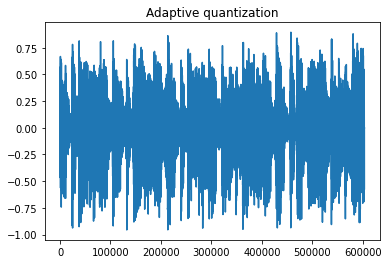

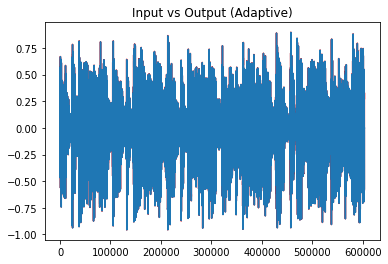

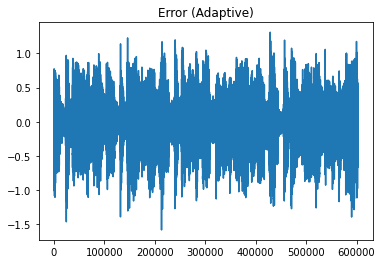

In [27]:
#Overlap and add for adaptive quantizer

#s = np.zeros(len(music))
s=eksodos[0][0:512]

#for i in range (1, 1179):
#    yfinal = np.concatenate((yfinal, (s1[i-1][512:639] + s1[i][0:639-512])))
#    yfinal = np.concatenate((yfinal, s1[i][639-512:512]))
dif=639-512
for i in range(1,windows):
    #if i==0:
    #   s=np.concatenate((s,eksodos[0][0:512]))
    #if i>=1 and i<windows:
    s=np.concatenate((s, (eksodos[i-1][512:639]+eksodos[i][0:dif])))
    #else:
    s=np.concatenate((s,eksodos[i][dif:512]))

zeros=np.zeros(len(music)-len(s))
s = np.concatenate((s, zeros))
plt.figure()
tmp = np.arange(len(s))
plt.plot(tmp, s)
plt.title("Adaptive quantization")

plt.figure()
n = np.arange(len(music))
plt.plot(tmp, s,  zorder=1)
plt.plot(n, music, c="r", zorder=0)
plt.title("Input vs Output (Adaptive)")
plt.plot()
sf.write('music_adaptive.wav', s, 44100)

plt.figure()
error=np.arange(len(music-s))
plt.plot(error, music-s)
plt.title("Error (Adaptive)")
plt.plot()

#calc mean square error
ms_error = ((music - s)**2).mean(axis=None)
print("Mean Square error is: ", ms_error)

#calc compression
final_bits = np.sum(bits_per_frame)
initial_bits = 16*len(music)
print("Compression rate for adaptive quantizer is: ", 100*final_bits/initial_bits, "%")

In [29]:
quantized_y_2 = np.zeros((windows, M, (L+N-1)//M+1))
#w_k_2 = np.zeros((windows, M, L+N))
#minTg_2 = np.zeros((windows, M))
bk_2 = np.zeros((windows, M))
bits_per_frame_2 = 0
eksodos_2=np.zeros((windows, N+2*L-1))

for i in range (windows):
    for j in range (M):
        bk_2[i][j] = 8
        levels = 2**bk_2[i][j]
        ymax = 1
        ymin = -1
        D = (ymax-ymin)/levels
        bits_per_frame_2 += 8 * len(y[i][j])
        partition = ymin + np.arange(1, levels)*D
        codebook = ymin + np.arange(0, levels)*D + D/2
        quantized_y_2[i][j] = quantize(y[i][j], partition, codebook)

        for k in range (0, L+N):
            if(k%M == 0):
                w_k[i][j][k] = quantized_y_2[i][j][k//M]

        tmp = np.convolve(w_k[i][j], g_k[j])
        eksodos_2[i] += tmp

Mean Square error is:  0.07191980321826622
Compression rate for adaptive quantizer is:  56.236107312464256 %


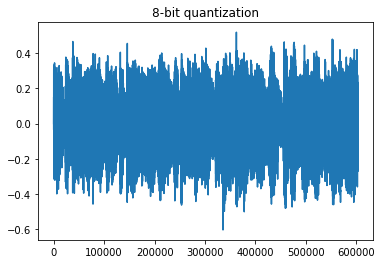

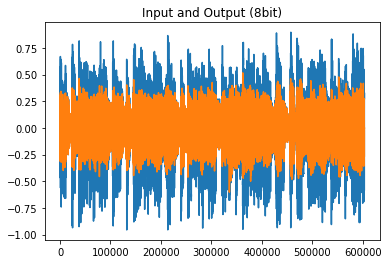

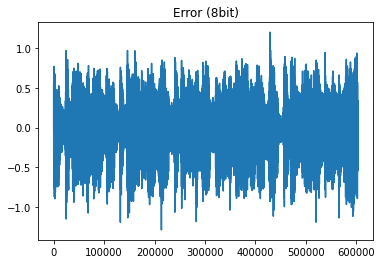

In [30]:
#Overlap and add for 8bit quantizer


s_2 = eksodos_2[0][0:512]

for i in range (1, windows):
    s_2 = np.concatenate((s_2, (eksodos_2[i-1][512:639] + eksodos_2[i][0:639-512])))
    s_2 = np.concatenate((s_2, eksodos_2[i][639-512:512]))

zeros_2=np.zeros(len(music)-len(s-2))
s_2 = np.concatenate((s_2, zeros))
plt.figure()
length = np.arange(len(s_2))
plt.plot(length, s_2)
plt.title("8-bit quantization")

plt.figure()
length_2 = np.arange(len(music))
plt.plot(length_2, music)
plt.plot(length, s_2)
plt.title("Input and Output (8bit)")

plt.figure()
error_2=np.arange(len(music-s_2))
plt.plot(error, (music-s_2))
plt.title("Error (8bit)")
plt.plot()

sf.write('music_8bits.wav', s_2, fs)

#calc mean square error
ms_error_2= ((music - s_2)**2).mean(axis=None)
print("Mean Square error is: ", ms_error_2)

#calc compression
final_bits_2 = np.sum(bits_per_frame_2)
initial_bits_2 = 16*len(music)
print("Compression rate for adaptive quantizer is: ", 100*final_bits_2/initial_bits_2, "%")